In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import PIL
from io import BytesIO
from IPython.display import display, Image


In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = "/content/drive/MyDrive/Dataset/train",target_size = (224,224))

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory = "/content/drive/MyDrive/Dataset/validation", target_size = (224,224))

Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
testdata.class_indices

{'COVID 19': 0, 'Non-COVID-19': 1}

In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights = 'imagenet', include_top = True)

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layers in (vggmodel.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
X = vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model = Model(inputs = vggmodel.input, outputs = predictions)

In [ ]:
model.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.09), metrics = ["accuracy"])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10, verbose = 1, mode = 'max')
                             
hist = model.fit_generator(generator = traindata, 
                                  steps_per_epoch = 5,
                                  epochs = 25,
                                  validation_data = testdata,
                                  validation_steps = 1
                                  
                                )

<ipython-input-86-2a2abdd7b2d3>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = traindata,


Epoch 1/25
5/5 [==============================] - 6s 1s/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.3105 - val_accuracy: 0.9062
Epoch 2/25
5/5 [==============================] - 5s 1s/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9375
Epoch 3/25
5/5 [==============================] - 5s 956ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9688
Epoch 4/25
5/5 [==============================] - 5s 1s/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 5/25
5/5 [==============================] - 4s 945ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9688
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9375
Epoch 7/25
5/5 [==============================] - 5s 1s/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.1590 - val_accuracy: 0.9375
Epoch 8/25
5/5 [===================

In [ ]:
model.save("predection_001.h5")

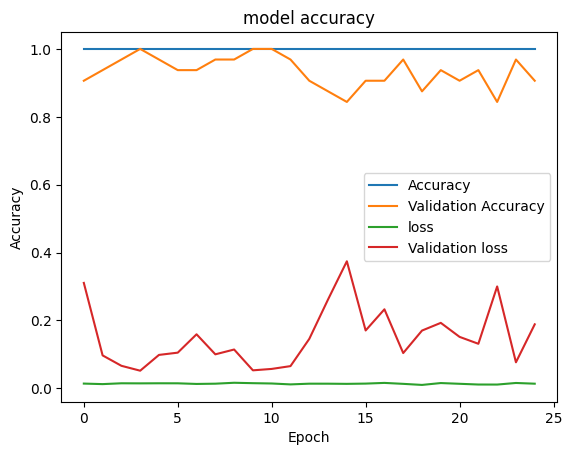

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation loss'])
plt.show()


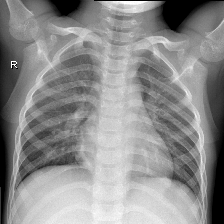

1/1 [==============================] - 0s 30ms/step
Non-COVID-19


In [ ]:
from tensorflow.keras.preprocessing import image
from io import BytesIO
import PIL
from IPython.display import display, Image

def display_img_array(ima):
  im = PIL.Image.fromarray(ima)
  bio = BytesIO()
  im.save(bio, format = 'png')
  display(Image(bio.getvalue(), format = 'png'))


path = "/content/NON-COVID19 (4).jpeg"
img = image.load_img(path,target_size = (224,224))
img = np.asarray(img)
display_img_array(img)
img = np.expand_dims(img, axis = 0)
output = model.predict(img)
if output[0][0] > output[0][1]:
   print("COVID19")
else:
   print("Non-COVID-19")

In [ ]:
y_actual = []
y_test = []

In [ ]:
path = "/content/drive/MyDrive/Dataset/validation/Non-COVID-19/"
for i in os.listdir(path):
  img = image.load_img(path +i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append (p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
path = "/content/drive/MyDrive/Dataset/validation/COVID 19/"
for i in os.listdir(path):
  img = image.load_img(path +i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append (p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(y_test)
print(y_actual)

[0.49900225, 0.17271073, 0.0017882362, 0.11664899, 0.17166588, 0.02357282, 0.048779298, 0.006452958, 0.0057392432, 0.009608698, 0.009617769, 0.0010282001, 0.15402058, 0.5174473, 0.0043368707, 0.13950951, 0.015075412, 0.05634433, 0.39362374, 0.104357556, 0.00484509, 0.6288963, 0.6668682, 0.07236614, 0.21068163, 0.48920906, 0.003803455, 0.016620122, 0.098471634, 0.6628648, 0.22582996, 0.03681328, 0.007468129, 0.003639898, 0.8915444, 0.0066469214, 0.0031391256, 0.0065007983, 0.018671539, 0.64179504, 0.0005933687, 0.09951554, 0.021673959, 0.07954306, 0.023205137, 0.020881604, 0.7597018, 0.00023980116, 0.96588326, 0.020734683, 0.31228474, 0.0031428644, 0.005039529, 0.045100495, 0.0046609063, 0.79214275, 0.089248784, 0.0036661464, 0.0062087257, 0.00034785067, 0.025241023, 0.06260458, 0.0075980998, 0.0018515289, 0.9714546, 0.030962966, 0.08793849, 0.0017921065, 0.85773754, 0.0031099927, 0.0333646, 0.012722948, 0.0037289467, 0.84282357, 0.033957023, 0.006321693, 0.0070717824, 0.036542334, 0.01

In [ ]:
y_pred = []
for i in y_test:
  if i > 0.50:
    y_pred.append(0)
  else:
    y_pred.append(1)


In [ ]:
print(len(y_pred))

800


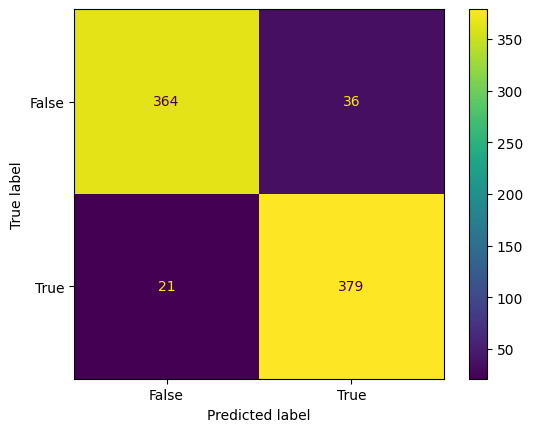

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_actual
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.92875


In [ ]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.8470319634703196


In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.9275


In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.8325


In [ ]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.8854415274463007


In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.88, 'Precision': 0.8470319634703196, 'Sensitivity_recall': 0.9275, 'Specificity': 0.8325, 'F1_score': 0.8854415274463007}
